<center> 
    <img src="./logo_UTN.svg" height=”250” width=200”>
</center>

<h1><center> TAREA SEMANAL 2 <center></h1>
    <h2><center> TEORIA DE LOS CIRCUITOS 2<center></h2>
    <h3>Destefano, Martin</h3>
    <h4> Para la siguiente red se pide: <h4>

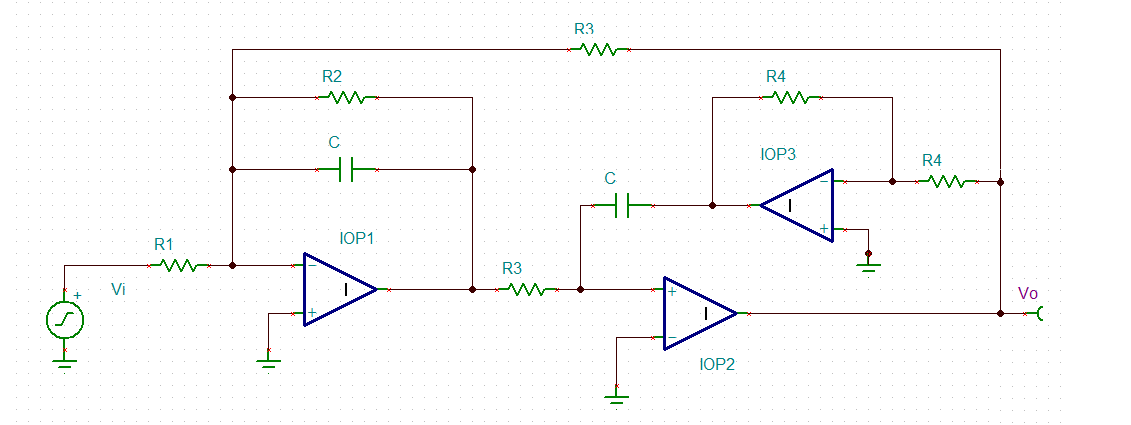

<ul>
  <li>Hallar la transferencia del circuito en funcion de $ \omega_{0} $y $Q$</li>
  <li>Obtener el valor de las componentes para que:  $ \omega_{0}=1 $y $Q=3$ </li>
  <li>Ajustar el valor de R1 para que $|T(0)| = 20dB $</li>
</ul>

[Desarrollo en papel](https://github.com/destefanomartin/TCII/blob/main/TS2/TS2_p.pdf)

<h3> Transferencia del circuito </h3> 

\begin{equation} \label{Basicas}
\frac{V_{i}}{R_{1}} = -V_{1}sC - \frac{V_{1}}{R_{2}} - \frac{V_{o}}{R_{3}}\,(Ec.1) \\
 \frac{V_{o}}{R_{4}} = -\frac{V_{3}}{R_{4}}\,(Ec.2) \\
 \frac{V_{1}}{R_{3}} = -V_{3}sC\, (Ec.3)
\end{equation}


De las ecuaciones 2 y 3: 
\begin{equation}
V_{1} = V_{o}sCR_{3} 
\end{equation}



Y luego 
\begin{equation} \label{transfer}
\frac{V_{i}}{R_{1}} = -V_{o}s^2c^2R_{3}-V_{o}sCR_{3}-\frac{V_{o}}{R_{3}} \\
\frac{V_{i}}{R_{1}} = -V_{o}\frac{s^2C^2R_{3}+sCR_{3}^2+R_{2}}{R_{3}R_{2}} \\
\frac{V_{o}}{V_{i}} = -\frac{1}{R_{1}}\frac{R_{3}R_{2}}{s^2c^2R_{3}+sCR_{3}^2+R_{2}}
\end{equation}

Divido por el coeficiente que multiplica el termino cuadratico para buscar la expresion requerida:
\begin{equation} \label{transfer2}
\frac{V_{o}}{V_{i}} = -\frac{R3}{R_{1}}\frac{\frac{1}{C^2R_{3}^2}}{s^2+\frac{s}{CR_{2}}+\frac{1}{C^2R_{3}^2}} \\
\omega_{0}^2 = \frac{1}{C^2R_{3}^2} \\
\frac{\omega_{0}}{Q} = \frac{1}{CR_{2}} \\
K = \frac{R_{3}}{R_{1}}
\end{equation}


\begin{equation} \label{transferFINAL}
\color{blue}{\frac{V_{o}}{V_{i}} = -K\frac{\omega_{0}^2}{s^2+s\frac{\omega_{0}}{Q}+{\omega_{0}}^2}}
\end{equation}


Con las condiciones de diseño dadas, puedo calcular las componentes adoptando R3 o C, por lo tanto, si adopto $R3=1K\Omega$: 
<ul>
  <li>$C=1mF$</li>
  <li>$R2=3K\Omega$ </li>
  <li>$R1=100\Omega$</li>
  <li>$R4=100\Omega$</li>
</ul>

El grafico de la respuesta de modulo nos indica que la ganancia en la banda de paso sera de 20dB como es pedido en el enunciado


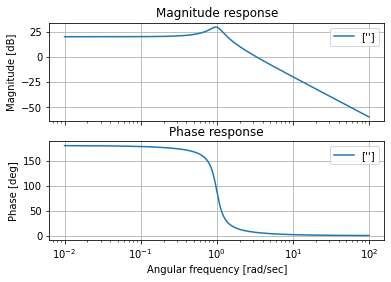

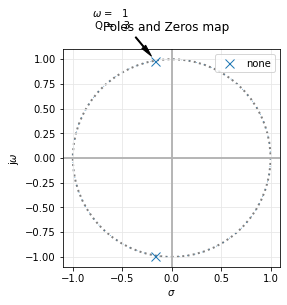

In [34]:
## Comprobacion numerica 
import numpy as np 
import scipy.signal as sig
import splane as sp 
import matplotlib as plt 
import math as m

## Elementos circutiales calculados
R1 = 100
R2 = 3000 
R3 = 1000
R4 = 100
C = 1e-3 
K = -(R3/R1)

num_lp_hand = [K/(C**2*R3**2)]
den_lp_hand = [1, 1/(C*R2), 1/(C**2*R3**2)]
lp_filter = sig.TransferFunction(num_lp_hand, den_lp_hand)

sp.bodePlot(lp_filter, 1)
    
sp.pzmap(lp_filter, 2) 
    
print("El grafico de la respuesta de modulo nos indica que la ganancia en la banda de paso sera de 20dB como es pedido en el enunciado")
    

Como Q = R2/R3 --> Q = 3. Esto se ve reflejado en los 9.69 dB de realce, equivalente a 3 veces la tension de la banda de paso.
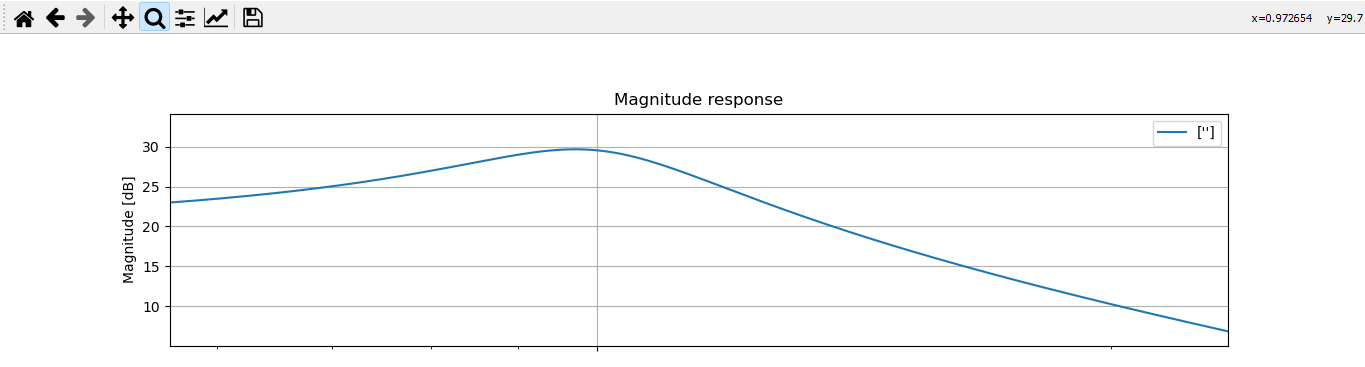


<h2> Bonus </h2>
<h3> Normalizacion del circuito </h3> 

Si: 
<ul>
  <li>$\Omega_{\omega} = \omega_{0}$</li>
  <li>$ \$=\frac{s}{\omega_{0}}$ </li>
</ul>
\begin{equation} \label{norm}
\frac{V_{o}}{V_{i}} = -(K)\frac{1}{\$^2+\$\frac{1}{Q}+1}
\end{equation}

Esto con respecto a la norma de frecuencia, ahora si tomamos como norma de impedancia $\Omega_{z} = R3$
<ul>
  <li>$C=1/R_{3}$</li>
  <li>$R2=QR_{3}$ </li>
  <li>$R1=\frac{R3}{K}$</li>
  <li>$R_{4}'=\frac{R_{4}}{R_{3}}$</li>
</ul>

<h3> Calculo de la sensibilidad </h3> 

\begin{equation} \label{sens}
S_{C}^{\omega_{0}}=\frac{C}{\omega_{0}}\frac{\partial\omega_{0}}{\partial C} = C (-\frac{R_{3}}{C^2R_{3}^2}) = -1 \\
S_{Q}^{R_{2}}=\frac{R_{2}}{Q}\frac{\partial Q}{\partial R_{2}} =\frac{R_{2}}{Q} (\frac{1}{R_{3}}) = 1 \\
S_{Q}^{R_{3}}=\frac{R_{3}}{Q}\frac{\partial Q}{\partial R_{3}} =\frac{R_{3}}{Q} (-\frac{R_{2}}{R_{3}^2}) = -1 
\end{equation}

<h3> Calculo de los valores para transferencia Butterworth </h3> 

\begin{equation} \label{butter}
|T(j\omega)|^2 = \frac{1}{1+\xi^2\omega_{n}^{2n}}
\end{equation}

Como es Butterworth: $\xi^2=1$ y de orden 2

\begin{equation} \label{butter2}
|T(j\omega)|^2 = \frac{1}{1+\omega^4} \\
\omega=\frac{s}{j} \\
\frac{1}{1+s^4} \\
\theta_{1} = \frac{\pi}{4};
\theta_{2} = \frac{3\pi}{4};
\theta_{3} = \frac{5\pi}{4};
\theta_{4} = \frac{7\pi}{4}; \\
\frac{V_{o}}{V_{i}} = -(K)\frac{1}{\$^2+\$\frac{\sqrt{2}}{2}+1}
\end{equation}

<h3> Calculo de pasabanda </h3> 

Para realizar un filtro pasabanda tomaremos la salida del primer operacional 

$$
$$\frac{V_{i}}{R_{1}} = -V_{1}sC - \frac{V_{1}}{R_{2}} - \frac{V_{1}}{sCR_{3}^2}\,(Ec.1) 

$$\frac{V_{i}}{R_{1}} = -V_{1}\frac{s^2C^2R_{3}+sCR_{3}^2+R_{2}}{sCR_{3}^2R_{2}} $$

$$\frac{V_{1}}{V_{i}} = -\frac{1}{R_{1}}\frac{\frac{s}{C}}{s^2+s\frac{1}{CR_{2}}+\frac{1}{C^2R_3^2}} \frac{R_{2}}{R_{2}}$$

$$\frac{V_{1}}{V_{i}} = -\frac{R_{2}}{R_{1}}\frac{\frac{s}{R_{2}C}}{s^2+s\frac{1}{CR_{2}}+\frac{1}{C^2R_3^2}}$$

$$\frac{V_{1}}{V_{i}} = -\frac{R_{2}}{R_{1}}\frac{\frac{s}{R_{2}C}}{s^2+s\frac{1}{CR_{2}}+\frac{1}{C^2R_3^2}}$$

$$ \frac{V_{1}}{V_{i}} = -{K}\frac{s\frac{\omega_{0}}{Q}}{s^2+s\frac{\omega_{0}}{Q}+{\omega_{0}}^2} $$

<ul>
  <li>$K=\frac{R_{2}}{R_{1}}$</li>
  <li>$\frac{\omega_{0}}{Q}=\frac{1}{R_{2}C}$ </li>
  <li>${\omega_{0}}^2 = \frac{1}{C^2R_{3}^2}$</li>
</ul>

El filtro se simulo con los mismos valores del pasabajos, por otro lado, la variacion de R1 y R4 no influye sobre el pasabanda.
Mientras que R2 tendra influencia sobre la selectividada del filtro, 


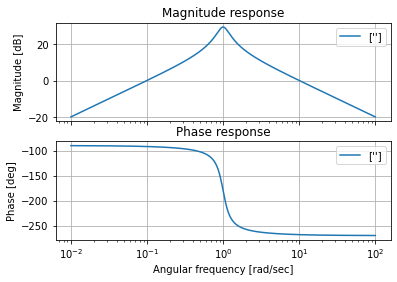

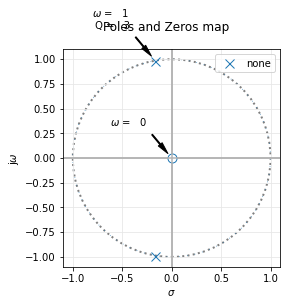

In [35]:
## Comprobacion numerica 
import numpy as np 
import scipy.signal as sig
import splane as sp 
import matplotlib as plt 
import math as m

## Elementos circutiales calculados
R1 = 100
R2 = 3000 
R3 = 1000
R4 = 100
C = 1e-3 


num_bp_hand = [(-R2/R1)*1/(R2*C), 0]
den_bp_hand = [1, 1/(R2*C), 1/(C**2*R3**2)]
lp_filter = sig.TransferFunction(num_bp_hand, den_bp_hand)

    
sp.bodePlot(lp_filter, 1)
    
sp.pzmap(lp_filter, 2) #S plane pole/zero plot

print ("El filtro se simulo con los mismos valores del pasabajos, por otro lado, la variacion de R1 y R4 no influye sobre el pasabanda.")
print ("Mientras que R2 tendra influencia sobre la selectividada del filtro, ")

<h3> Simulaciones </h3> 

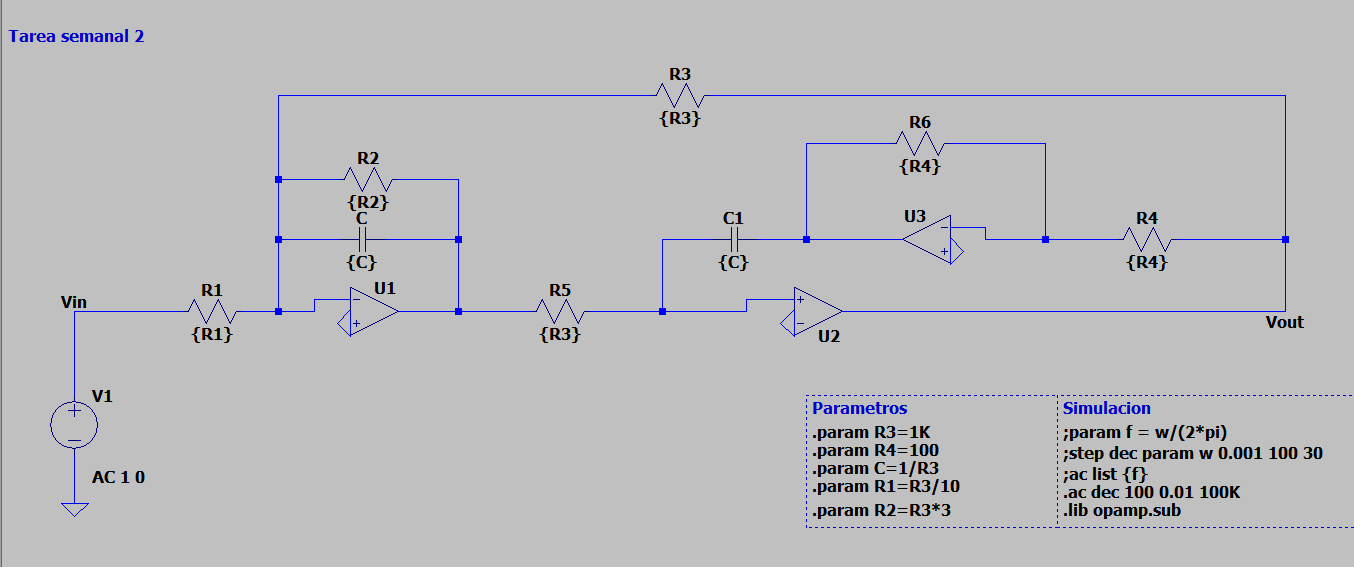

<h4> Pasabajos </h4> 

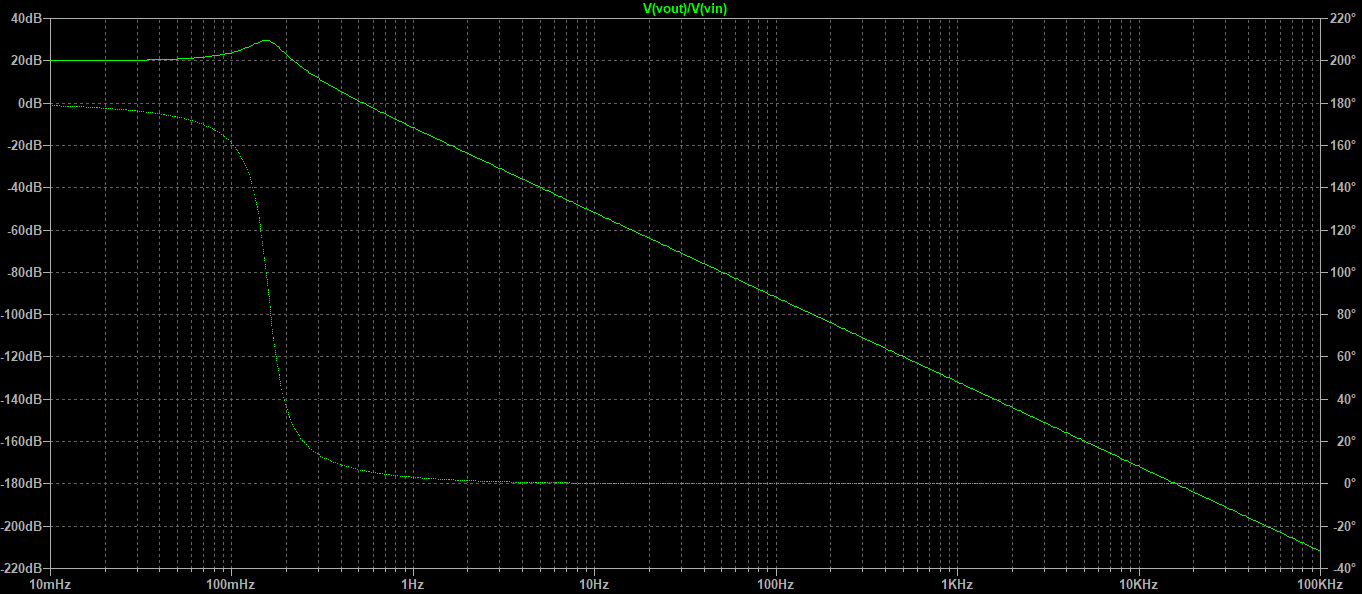

<h4> Pasabanda </h4> 

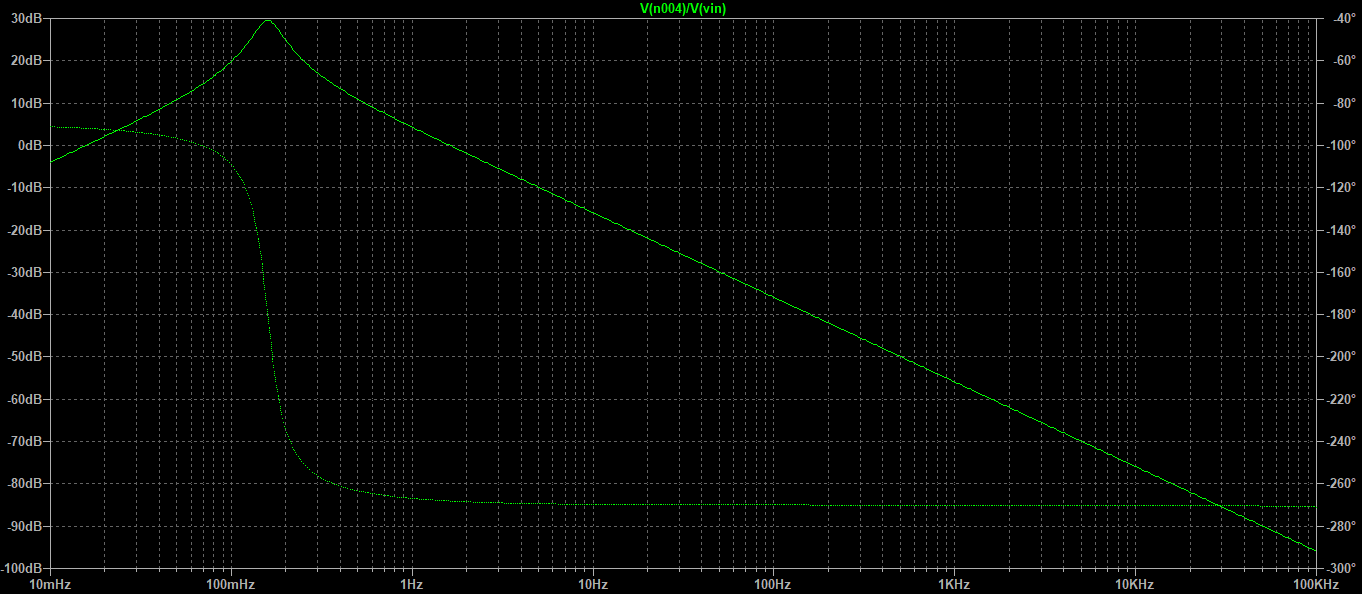

Tanto el grafico de pasabajos como de pasabanda se corresponden a simple vista con lo calculado en la simulacion numerica. 